Task 2 :Determining the optimum number of clusters using elbow and silhouette method


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Elbow method to find optimum number of clusters

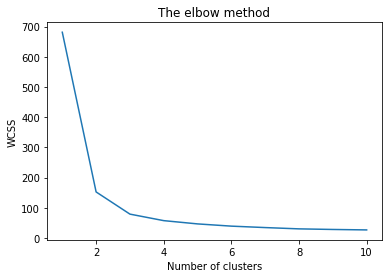

In [2]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Method

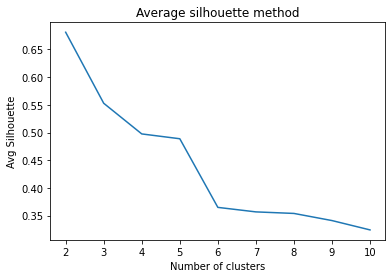

In [3]:
from sklearn.metrics import silhouette_score,pairwise_distances
avg_list=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    
    cluster_labels=kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels,metric='euclidean')
    avg_list.append(silhouette_avg)


plt.plot(range(2, 11), avg_list)
plt.title('Average silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Avg Silhouette')
plt.show()

Visualization of Silhouette Method

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


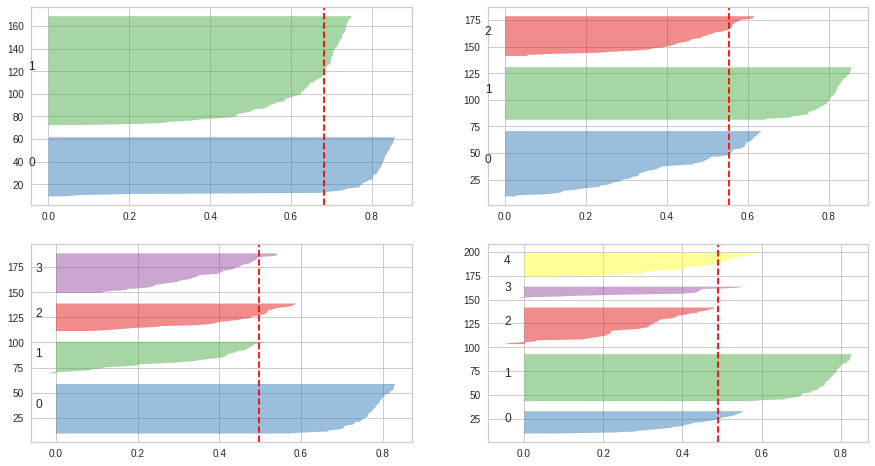

In [4]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

Create a Kmeans Model having n_clusters=3

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(x[y_kmeans == 0, 0])

[6.9 6.7 6.3 7.1 6.3 6.5 7.6 7.3 6.7 7.2 6.5 6.4 6.8 6.4 6.5 7.7 7.7 6.9
 7.7 6.7 7.2 6.4 7.2 7.4 7.9 6.4 6.1 7.7 6.3 6.4 6.9 6.7 6.9 6.8 6.7 6.7
 6.5 6.2]


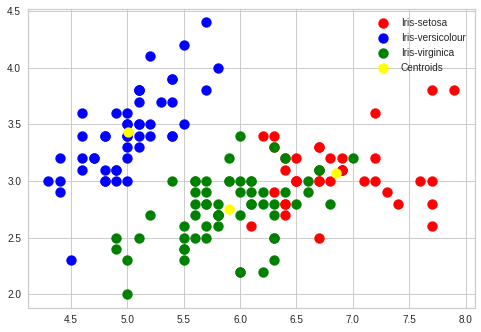

In [6]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Scratch Implementation of Kmeans Clustering Model**

In [8]:
import statistics 
import numpy as np
from scipy.spatial import distance
class Kmeans:
  def __init__(self,k,iters):
    self.k=k
#    self.acc=acc
    self.iters=iters

  def intialize_centroids(self,data):
    self.centroids=[]
    print(self.k)
    for i in range(self.k):
      self.centroids.append(data[i])
  def cal_distance(self,point,centroid):
    sums=0
    for i in range(len(point)):
      sums+=(point[i]-centroid[i])**2
    return sums**0.5
  
  def classify(self,data):
    self.cluster={}
    for j in range(self.iters):
      for l in range(len(self.centroids)):
        self.cluster[l]=[]
      for points in data:
        distance=[self.cal_distance(points,centroid) for centroid in self.centroids]
        min_distance=distance.index(min(distance))
        self.cluster[min_distance].append(points)

      for k,v in self.cluster.items():
        self.centroids[k]=np.average(v,axis=0)
    return self.cluster

abc=Kmeans(3,300)
abc.intialize_centroids(x)
ans=abc.classify(x)
print(ans[0])
print(ans[1])




        


3
[array([7. , 3.2, 4.7, 1.4]), array([6.9, 3.1, 4.9, 1.5]), array([6.7, 3. , 5. , 1.7]), array([6.3, 3.3, 6. , 2.5]), array([7.1, 3. , 5.9, 2.1]), array([6.3, 2.9, 5.6, 1.8]), array([6.5, 3. , 5.8, 2.2]), array([7.6, 3. , 6.6, 2.1]), array([7.3, 2.9, 6.3, 1.8]), array([6.7, 2.5, 5.8, 1.8]), array([7.2, 3.6, 6.1, 2.5]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.7, 5.3, 1.9]), array([6.8, 3. , 5.5, 2.1]), array([6.4, 3.2, 5.3, 2.3]), array([6.5, 3. , 5.5, 1.8]), array([7.7, 3.8, 6.7, 2.2]), array([7.7, 2.6, 6.9, 2.3]), array([6.9, 3.2, 5.7, 2.3]), array([7.7, 2.8, 6.7, 2. ]), array([6.7, 3.3, 5.7, 2.1]), array([7.2, 3.2, 6. , 1.8]), array([6.4, 2.8, 5.6, 2.1]), array([7.2, 3. , 5.8, 1.6]), array([7.4, 2.8, 6.1, 1.9]), array([7.9, 3.8, 6.4, 2. ]), array([6.4, 2.8, 5.6, 2.2]), array([6.1, 2.6, 5.6, 1.4]), array([7.7, 3. , 6.1, 2.3]), array([6.3, 3.4, 5.6, 2.4]), array([6.4, 3.1, 5.5, 1.8]), array([6.9, 3.1, 5.4, 2.1]), array([6.7, 3.1, 5.6, 2.4]), array([6.9, 3.1, 5.1, 2.3]), array([6.8,